In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18

# 加载 CIFAR-10 数据集
def load_cifar10(batch_size=128):
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader

# 加载预训练的 ResNet18
def load_resnet18():
    model = resnet18(pretrained=True)
    model.fc = nn.Linear(512, 10)  # 替换最后一层为 10 类
    return model

# 训练模型
def train_model(model, trainloader, testloader, epochs=50, lr=0.01, device='cuda'):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")

        # 测试模型
        test_model(model, testloader, device)
    # 保存模型
    torch.save(model.state_dict(), 'resnet18_cifar10.pth')

# 测试模型
def test_model(model, testloader, device='cuda'):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    print(f"Accuracy: {100. * correct / total:.2f}%")

if __name__ == "__main__":
    trainloader, testloader = load_cifar10()
    model = load_resnet18()
    train_model(model, trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


/home/caoyufei/Anaconda/yes/envs/pfllib/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/caoyufei/Anaconda/yes/envs/pfllib/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 1.0447116857751861
Accuracy: 71.76%
Accuracy: 71.76%
Epoch 2, Loss: 0.710739944444593
Epoch 2, Loss: 0.710739944444593
Accuracy: 75.59%
Accuracy: 75.59%
Epoch 3, Loss: 0.6233511551109421
Epoch 3, Loss: 0.6233511551109421
Accuracy: 77.12%
Accuracy: 77.12%
Epoch 4, Loss: 0.5613258307242333
Epoch 4, Loss: 0.5613258307242333
Accuracy: 78.12%
Accuracy: 78.12%
Epoch 5, Loss: 0.5306371711861447
Epoch 5, Loss: 0.5306371711861447
Accuracy: 80.17%
Accuracy: 80.17%
Epoch 6, Loss: 0.49756960749931045
Epoch 6, Loss: 0.49756960749931045
Accuracy: 79.56%
Accuracy: 79.56%
Epoch 7, Loss: 0.47051176436416936
Epoch 7, Loss: 0.47051176436416936
Accuracy: 79.73%
Accuracy: 79.73%
Epoch 8, Loss: 0.4495031224644702
Epoch 8, Loss: 0.4495031224644702
Accuracy: 81.35%
Accuracy: 81.35%
Epoch 9, Loss: 0.42809679532599876
Epoch 9, Loss: 0.42809679532599876
Accuracy: 81.48%
Accuracy: 81.48%
Epoch 10, Loss: 0.4201516387483958
Epoch 10, Loss: 0.4201516387483958
Accuracy: 81.82%
Accuracy: 81.82%
Epoch 11

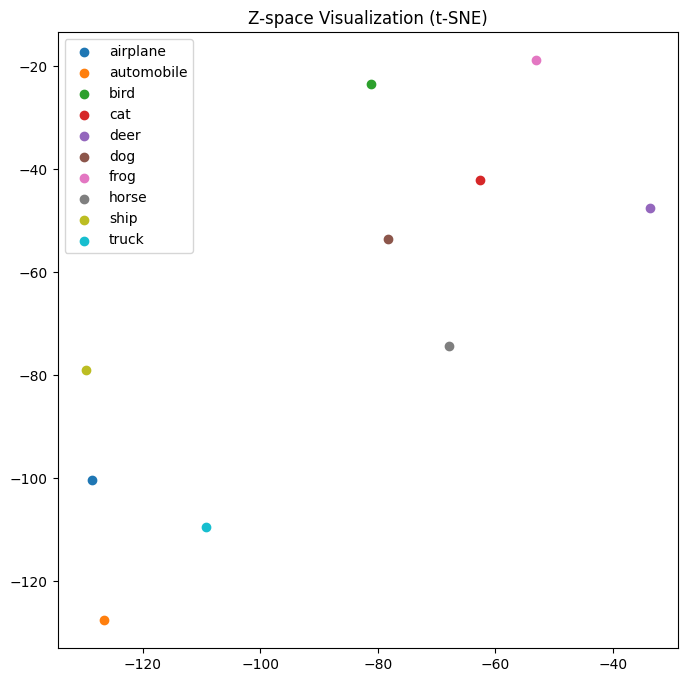

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# CIFAR-10 类别名称
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 读取 GloVe 文件
def load_glove_embeddings(glove_path, classes):
    embeddings = {}
    with open(glove_path, 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector

    # 提取 CIFAR-10 类别的词向量
    z_space = np.array([embeddings[c] for c in classes if c in embeddings])
    return z_space

# 可视化 Z-space
def visualize_z_space(z_space, classes):
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # 将 perplexity 设置为小于样本数
    z_tsne = tsne.fit_transform(z_space)

    plt.figure(figsize=(8, 8))
    for i, label in enumerate(classes):
        plt.scatter(z_tsne[i, 0], z_tsne[i, 1], label=label)
    plt.legend()
    plt.title("Z-space Visualization (t-SNE)")
    plt.show()

if __name__ == "__main__":
    glove_path = '../root/data/glove.6B.50d.txt'
    z_space = load_glove_embeddings(glove_path, CIFAR10_CLASSES)
    visualize_z_space(z_space, CIFAR10_CLASSES)

Files already downloaded and verified


/home/caoyufei/Anaconda/yes/envs/pfllib/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/caoyufei/Anaconda/yes/envs/pfllib/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


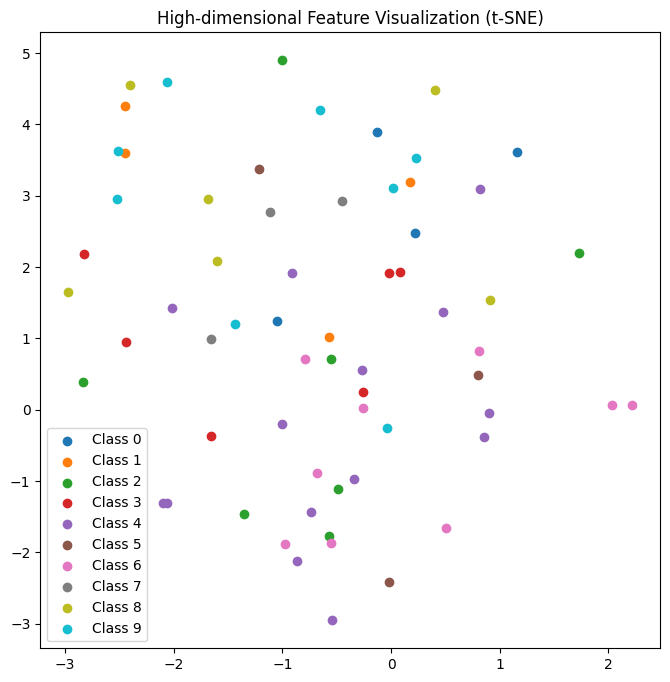

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet18

# 加载 CIFAR-10 数据集
def load_cifar10(batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    return trainloader

# 可视化高维特征
def visualize_high_dimensional_features(features, labels):
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)

    plt.figure(figsize=(8, 8))
    num_classes = len(np.unique(labels))
    for class_idx in range(num_classes):
        indices = labels == class_idx
        plt.scatter(features_2d[indices, 0], features_2d[indices, 1], label=f'Class {class_idx}')
    plt.legend()
    plt.title("High-dimensional Feature Visualization (t-SNE)")
    plt.show()

# 提取 ResNet18 的倒数第二层特征
def extract_resnet18_features(model, dataloader, device='cuda'):
    model = model.to(device)
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            features.append(outputs.cpu().numpy())
            labels.append(targets.numpy())
            break  # 只处理一个 batch
    return np.concatenate(features, axis=0), np.concatenate(labels, axis=0)

# 主程序
if __name__ == "__main__":
    # 加载数据
    trainloader = load_cifar10(batch_size=256)
    data_iter = iter(trainloader)
    images, labels = next(data_iter)

    # 加载预训练的 ResNet18
    model = resnet18(pretrained=True)
    model.fc = torch.nn.Identity()  # 移除最后一层全连接层，提取倒数第二层特征

    # 提取高维特征
    features, labels = extract_resnet18_features(model, trainloader)

    # 可视化高维特征
    visualize_high_dimensional_features(features, labels)